<a href="https://www.kaggle.com/code/abhishek529910/ml-task-on-algerian-data?scriptVersionId=108278470" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/algerian-dataset/Algerian_forest_fires_dataset_UPDATEd.csv', header=0)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [5]:
#df.drop('Classes  ', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 24.9 KB


In [7]:
for col in df.columns:
  print(df[col].unique())
  print()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

[6 7 8 9]

[2012]

[29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]

[57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]

[18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]

[ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]

[65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.  85.6 66.6 81.1 75.1 81.8 73.9 60.7
 72.6 82.8 85.4 88.1 73.4 68.2 70.  84.3 89.2 90.3 86.5 87.2 78.8 78.
 76.6 85.  86.4 77.1 87.4 88.9 81.3 82.4 80.2 89.3 89.4 88.3 88.6 89.5
 85.8 84.9 90.1 72.7 52.

Since year do not have any effect/singficance on forest fire/temperature so we can safely remove it.

In [8]:
df.drop('year', axis=1, inplace=True)

In [9]:
#df['FWI'].astype('float64')

In [10]:
#df.astype(np.int64).dtypes

In [11]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.057787
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.433479
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.675000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [12]:
# Checking missing values
df.isnull().sum()     #or df.isna().sum()

day            0
month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
dtype: int64

In [13]:
# having a look at correlation
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.349762
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.081154
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.567993
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.582006
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.034966
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324858
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691848
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874423
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.735687
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.920926


In [14]:
#sns.pairplot(df)

<AxesSubplot:>

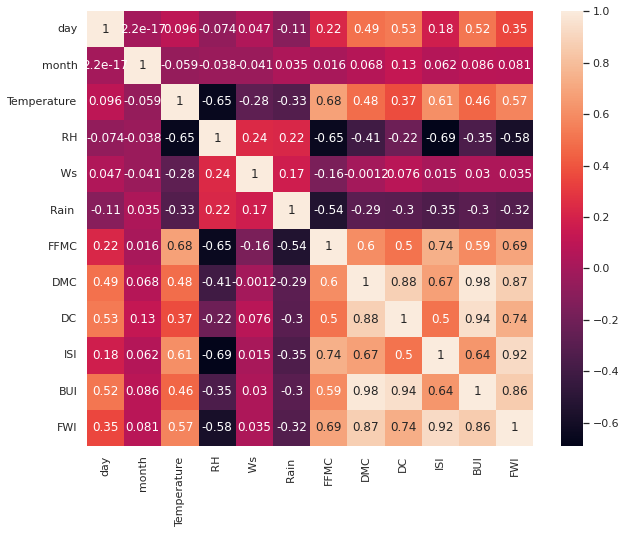

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(), annot=True)

We can see, temperature has significant negative correlation with RH and positive correlation with FFMC, DMC, ISI, BUI and FWI

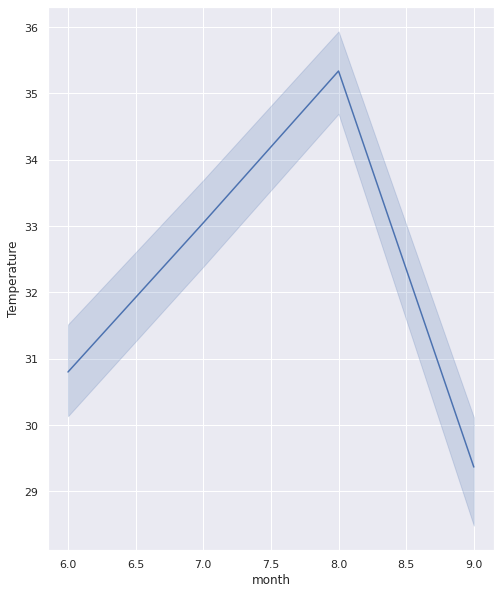

In [16]:
plt.figure(figsize=(8,10))
sns.lineplot(x=df['month'], y=df['Temperature'])
plt.xlabel('month')
plt.ylabel('Temperature')
plt.show()

From this we can see maximum temperature goes more than 35 degree in 8th month and minimum in the 9th month. So in the 8th month forest fire can be observed more frequently than ohter month.

Text(0, 0.5, 'Temperature')

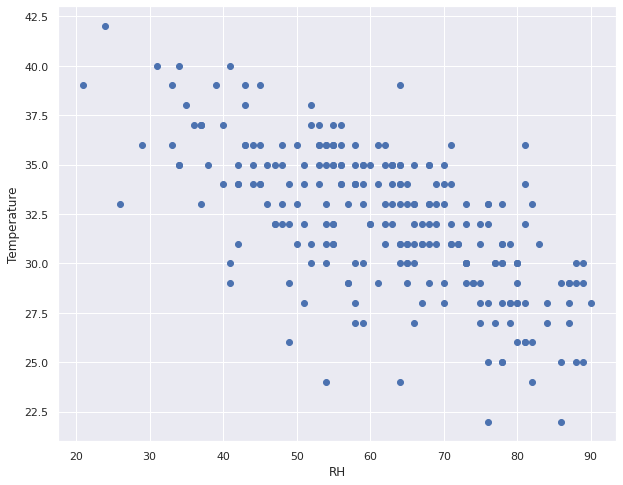

In [17]:
plt.scatter(df[' RH'], df['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

We can see there is a negative correlation between RH and Temperature

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel=' Ws'>

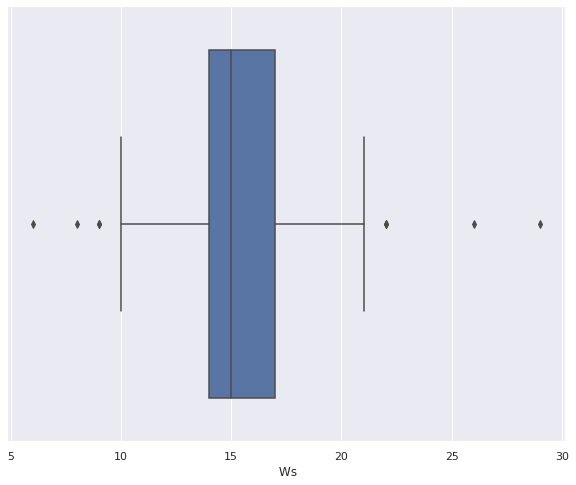

In [18]:
sns.boxplot(df[' Ws'])   

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rain '>

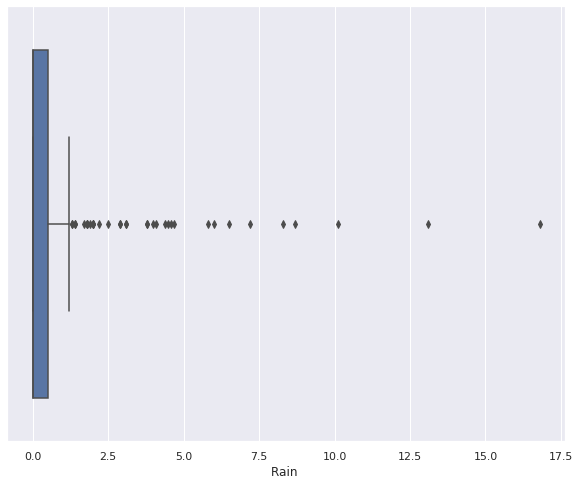

In [19]:
sns.boxplot(df['Rain '])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FFMC'>

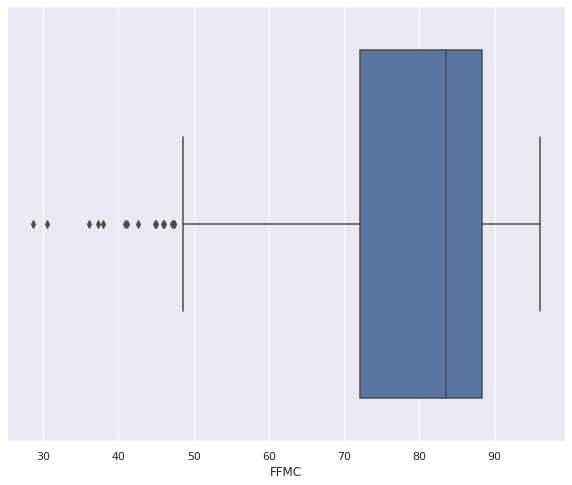

In [20]:
sns.boxplot(df['FFMC'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DMC'>

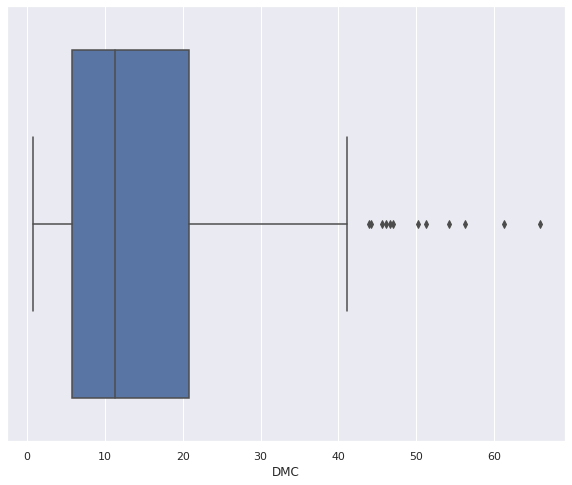

In [21]:
sns.boxplot(df['DMC'])

In [22]:
# Independent and Dependent features
X = df.drop('Temperature', axis=1)  
y = df['Temperature'] # or y=dataset.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=12)

In [25]:
X_train.shape

(163, 11)

In [26]:
y_train.shape

(163,)

In [27]:
X_test.shape

(81, 11)

In [28]:
y_test.shape

(81,)

In [29]:
# standardize and feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaler

StandardScaler()

In [31]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
126,5,6,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9
47,18,7,68,14,0.0,85.4,12.1,43.1,4.6,14.2,6.0
62,2,8,55,12,0.4,78.0,5.8,10.0,1.7,5.5,0.8
139,18,6,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4
233,20,9,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
130,9,6,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9
134,13,6,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9
155,4,7,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9


In [32]:
#X_train.replace('14.6 9',14.6)

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)   
# To avoid data leakage we apply only transform on test data
# we are using same mu and sigma, which is calculated on training data

# Model Training 

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# print the coefficients and intercepts
print(regression.coef_)

[-0.14558568 -0.27629348 -1.01825743 -0.596871    0.04462364  1.20250975
  1.46941082  0.64050398 -0.06687584 -1.2156876  -0.03690159]


In [38]:
print(regression.intercept_)

32.190184049079754


In [39]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [40]:
y_pred

array([30.49906349, 28.31437674, 32.58355588, 33.30796192, 32.54033977,
       33.57845817, 29.58893148, 31.17713922, 31.43538894, 26.89412196,
       32.744985  , 31.12036589, 38.11797633, 31.43191057, 29.75285504,
       31.8590946 , 27.27181445, 32.61746618, 32.9766177 , 26.96079324,
       35.45209981, 36.88527212, 35.14071593, 32.77892441, 31.53417185,
       35.65966141, 27.39987684, 34.24674977, 34.35359755, 32.4562616 ,
       34.35591562, 27.19798931, 35.25509059, 38.61529759, 33.57627446,
       29.80190754, 32.37061915, 34.36222662, 31.62151122, 37.09261946,
       30.41156867, 29.99590611, 33.16033126, 28.6508105 , 35.15830779,
       31.08017612, 30.80263884, 37.65511248, 33.25772875, 28.70541291,
       36.55346502, 28.62189919, 35.04038986, 36.2102121 , 26.30119021,
       30.29923139, 31.76439037, 33.32044416, 31.63207732, 33.79571891,
       33.50685241, 30.4560347 , 31.37631463, 33.31719948, 34.45112535,
       31.95519835, 31.69088064, 31.75771353, 36.15086007, 34.25

# Assumptions of Linear Rigression

Text(0, 0.5, 'Predicted Temperature')

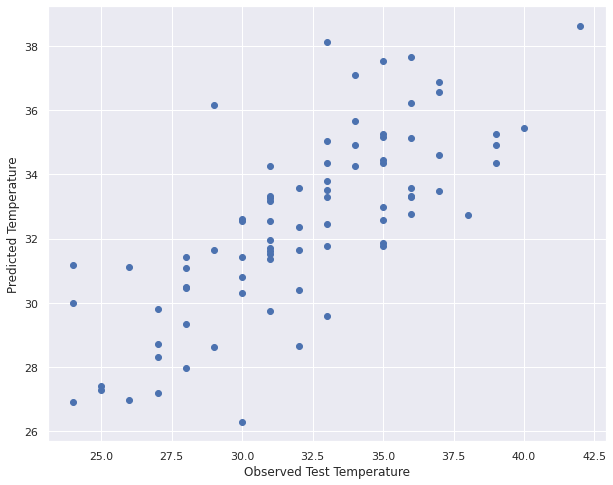

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel("Observed Test Temperature")
plt.ylabel("Predicted Temperature")

# residuals

In [42]:
residuals = y_test-y_pred
residuals

152   -2.499063
31    -1.314377
48     2.416444
61     2.692038
239   -2.540340
         ...   
182    2.388008
85    -0.259295
206   -2.533968
168    0.341290
14     0.040240
Name: Temperature, Length: 81, dtype: float64

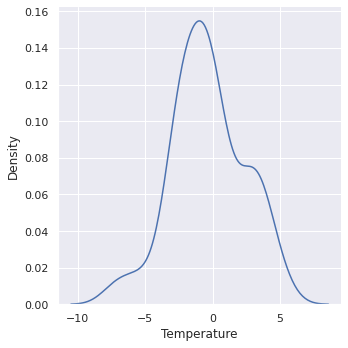

In [43]:
sns.displot(residuals, kind='kde')

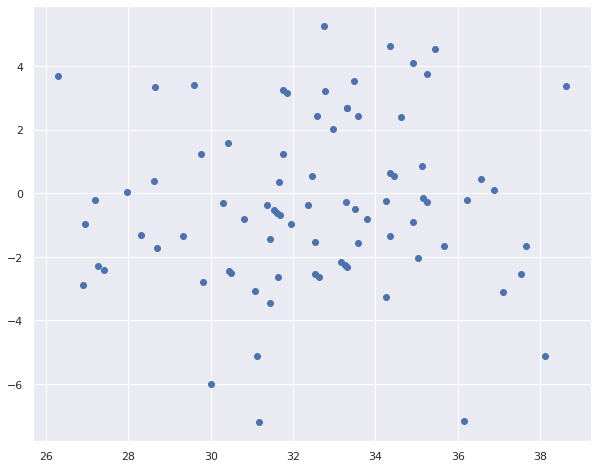

In [44]:
# scatter plot with predictions and residuals
# uniform distribution
plt.scatter(y_pred, residuals)

# Performance Metrics

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [47]:
print(mse)
print(mae)
print(rmse)

7.159467754838624
2.1288512114650953
2.675718175525708


# R square and adjusted R square

In [48]:
from sklearn.metrics import r2_score

In [49]:
#  r square
score = r2_score(y_test, y_pred)
score

0.5481775620455522

In [50]:
# Adjusted R Square
r2_adjusted = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Task

# 1. Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

In [52]:
lasso = Lasso()

In [53]:
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.         -0.         -0.52249454 -0.         -0.          0.99504753
  0.02327582  0.          0.          0.          0.        ]


In [54]:
print(lasso.intercept_)

32.190184049079754


In [55]:
# Prediction for test data
y_pred2 = lasso.predict(X_test)

Text(0, 0.5, 'Predicted Temperature')

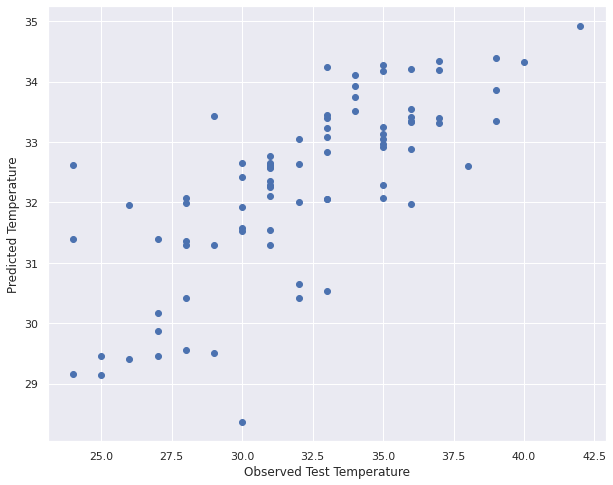

In [56]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Observed Test Temperature")
plt.ylabel("Predicted Temperature")

In [57]:
residuals2 = y_test-y_pred2
residuals2

152   -3.356946
31    -3.173436
48     1.954552
61     3.107841
239   -2.645676
         ...   
182    3.688794
85     1.865946
206    0.820640
168   -0.015004
14    -1.551188
Name: Temperature, Length: 81, dtype: float64

In [58]:
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

In [59]:
#  r square
score2 = r2_score(y_test, y_pred2)
score2

0.41099183827156327

In [60]:
# Adjusted R Square
r2_adjusted2 = 1-(1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# 2. Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

In [62]:
ridge = Ridge()

In [63]:
ridge.fit(X_train, y_train)

Ridge()

In [64]:
print(ridge.coef_)

[-0.14035334 -0.27216264 -1.02757775 -0.59525413  0.03363867  1.17003361
  0.96848872  0.38648859 -0.00651663 -0.44510291 -0.11797442]


In [65]:
print(ridge.intercept_)

32.190184049079754


In [66]:
# Prediction for test data
y_pred3 = ridge.predict(X_test)

Text(0, 0.5, 'Predicted Temperature')

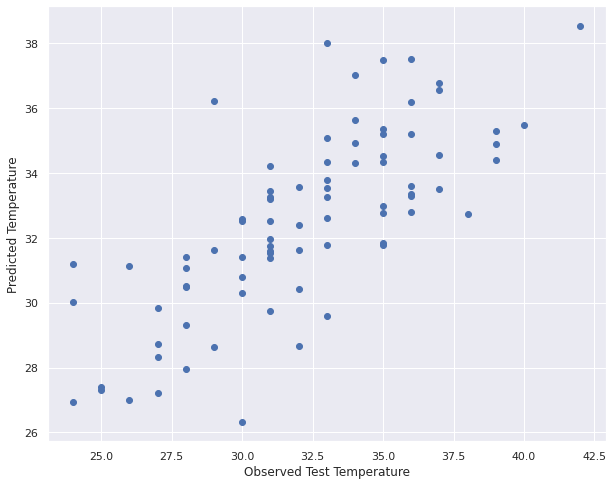

In [67]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Observed Test Temperature")
plt.ylabel("Predicted Temperature")

In [68]:
residuals3 = y_test-y_pred3
residuals3

152   -2.494520
31    -1.327447
48     2.235148
61     2.702140
239   -2.518683
         ...   
182    2.462315
85    -0.349392
206   -2.467416
168    0.376769
14     0.036722
Name: Temperature, Length: 81, dtype: float64

In [69]:
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))

In [70]:
#  r square
score3 = r2_score(y_test, y_pred3)
score3

0.5489312424930484

In [71]:
# Adjusted R Square
r2_adjusted3 = 1-(1-score3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# 3. Elastic Regression 

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
elastic = ElasticNet()

In [74]:
elastic.fit(X_train, y_train)

ElasticNet()

In [75]:
print(elastic.coef_)

[ 0.         -0.         -0.60024794 -0.18756145 -0.          0.69202411
  0.25264411  0.          0.10801049  0.13027155  0.11000974]


In [76]:
print(elastic.intercept_)

32.190184049079754


In [77]:
y_pred4 = elastic.predict(X_test)

Text(0, 0.5, 'Predicted Temperature')

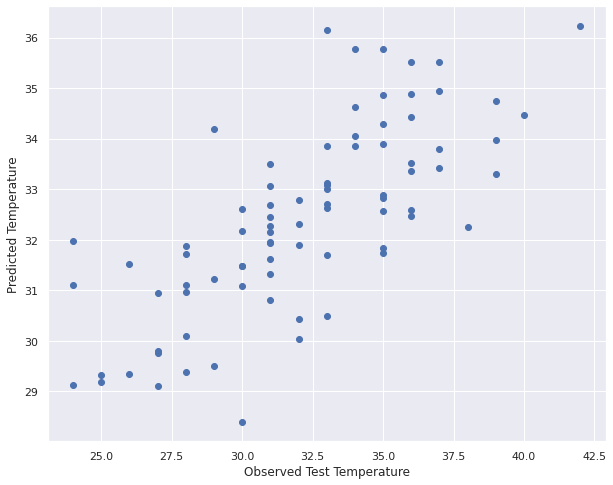

In [78]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Observed Test Temperature")
plt.ylabel("Predicted Temperature")

In [79]:
residuals4 = y_test-y_pred4
residuals4

152   -2.969979
31    -2.764399
48     2.119942
61     3.414657
239   -2.611568
         ...   
182    3.204112
85     0.704044
206   -0.766691
168    0.105030
14    -1.377158
Name: Temperature, Length: 81, dtype: float64

In [80]:
mse4 = mean_squared_error(y_test, y_pred4)
mae4 = mean_absolute_error(y_test, y_pred4)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))

In [81]:
#  r square
score4 = r2_score(y_test, y_pred4)
score4

0.4615819671533301

In [82]:
# Adjusted R Square
r2_adjusted4 = 1-(1-score4)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [83]:
r2_score = [score, score2, score3, score4]
adjusted_r2_score = [r2_adjusted, r2_adjusted2, r2_adjusted3, r2_adjusted4]
mse_val = [mse, mse2, mse3, mse4]
mae_val = [mae, mae2, mae3, mae4]
rmse_val = [rmse, rmse2, rmse3, rmse4]

In [84]:
data = {
    'R Square': r2_score,
    'Adjusted R Square': adjusted_r2_score,
    'MSE': mse_val,
    'MAE': mae_val,
    'RMSE': rmse_val
}

In [85]:
data

{'R Square': [0.5481775620455522,
  0.41099183827156327,
  0.5489312424930484,
  0.4615819671533301],
 'Adjusted R Square': [0.47614789802382873,
  0.31709198640181246,
  0.4770217304267227,
  0.3757472082937161],
 'MSE': [7.159467754838624,
  9.333279153472825,
  7.147525118953317,
  8.53164035465191],
 'MAE': [2.1288512114650953,
  2.4525256488415814,
  2.1261247550972486,
  2.3128544766769314],
 'RMSE': [2.675718175525708,
  3.0550415960298847,
  2.6734855748541673,
  2.9208971831702515]}

# Summary

In [86]:
df2 = pd.DataFrame(data, index=['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Regression'])
df2

,R Square,Adjusted R Square,MSE,MAE,RMSE
Linear Regression,0.548178,0.476148,7.159468,2.128851,2.675718
Lasso Regression,0.410992,0.317092,9.333279,2.452526,3.055042
Ridge Regression,0.548931,0.477022,7.147525,2.126125,2.673486
Elastic Regression,0.461582,0.375747,8.531640,2.312854,2.920897


**Conclusion: Simple linear regression is best suitable algorithm**